#Gasto de los estudiantes per cápita en Educación mediante un Árbol de Regresión

#1.Introducción


Se va a realizar un árbol de regresión para predecir el gasto en educación de los estudiantes que cursan estudios oficiales. Para ello vamos a utilizar la encuesta de Gasto de los Hogares en Educación del INE del curso 2019-2020 que se puede descargar en el siguiente enlace:

https://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736176983&menu=resultados&idp=1254735573113#!tabs-1254736195732






## 1.1 Datos y variables
Las variables que vamos a utilizar son:

*   TMUNI: Tamaño del municipio
*   NHOGAR: Número de personas en el hogar
*   EHOGAR: Número de estudiantes en el hogar
*   SEXO
*   NACIONALIDAD
*   NEST2: Nivel de estudios desagregado
*   C01: Tipo de enseñanza
*   C03: Localización del centro educativo
*   GTT: Gasto total en educación
*   E59: Si han recibido beca o no

##1.2 ¿Qué es un árbol?
Un árbol es un modelo predictivo en el que las observaciones se dividen de forma binaria dependiendo de una serie de reglas en función de sus atributos para predecir una variable que puede ser tanto cualitativa(árboles de clasificación) como cuantitativa (árboles de regresión) estos árboles son conocidos como CART(Classification And Regression Trees).

Los árboles utilizan técnicas no paramétricas con las que se consiguen segmentos (nodos) en las que están los subconjuntos de la muestra. El segmento que contiene todos los datos iniciales se le llama raíz y aquellos que no tienen sucesores se les llama hojas. A los nodos también se les puede llamar "padre" e "hijo", como se puede intuir, el padre es el que se divide en los hijos.

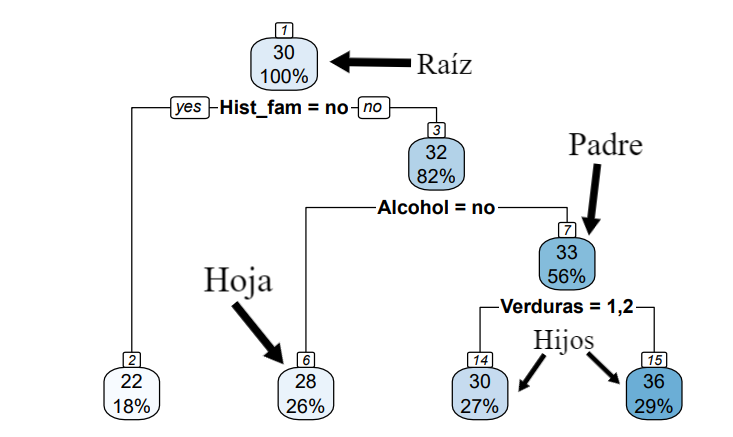

###1.2.1 Ventajas

* Son fáciles de interpretar.

* Permiten encontrar relaciones que con otros método sería difícil.

* Se pueden representar.

* En general no se tienen por qué crear variables dummy.

* No hay asunciones sobre la distribución.

* En general requieren mucha menos limpieza y preprocesado de los datos.No mejoran al aplicar transformaciones monótonas a las variables predictoras.

* No se ven muy influenciados por atípicos.

* Se pueden utilizar con valores ausentes.

* Se puede ver qué variables son más importantes.

* La selección de variables se hace de forma automática ya que forman parte de la creación del árbol.

* Pueden aplicarse a problemas de regresión y clasificación.

###1.2.2 Desventajas
* Las predicciones son las mismas para cada nodo.

* La capacidad predictiva de un sólo árbol es peor que con otros modelos. Por esto, se utilizan técnicas con múltiples árboles como bagging o random forest.

* Son muy sensibles a las variables y los datos desbalanceados.

* Los predictores continuos pierden información ya que al dividirlos se están categorizando.

* Si la relación entre la variable dependiente y una predictora es lineal le cuesta modelizarlo.

##1.3 Construcción de un árbol
En la construcción de un árbol necesitamos:
1. Las reglas que definen a los nodos, tenemos que saber qué variable utilizar y como realizar la división de esta. Para ello se busca el mejor punto de corte para cada variable y de ahí seleccionar la que dé mejores resultados.
Dependiendo del tipo de árbol utilizamos distintos métodos. Para regresión se suele utilizar el MSE y para clasificación el índice de Gini y la entropía.

    Un nodo será dividido hasta que:

    *   Ninguna variable produzca una mejora.
    *   Todas las divisiones hagan que el nodo hijo sea más pequeño de lo que queramos.
    *   El nodo a dividir ya es lo suficientemente pequeño.
    *   La profundidad (distancia entre la raíz y la hoja más alejada) supere el máximo que hayamos definido.


2. Los valores de la predicción. Para las cualitativas son las proporciones observadas para cada categoría en el nodo y para las cuantitativas son las medias.

3. Para evitar el overfitting o sobreajuste se puede utilizar el pruning o poda para encontrar un árbol más pequeño que tenga capacidad predictiva igual o mejor que el árbol completo.

##1.4 Criterio en árbol de regresión
Para encontrar el árbol, se utiliza un algoritmo llamado recursive binary splitting, con este método no se evalúan todas las combinaciones posibles pero encuentra una solución suficientemente buena.

1. Comenzamos en la parte más alta del árbol donde todas las observaciones pertenecen al mismo nodo.

2. Se selecciona el mejor punto de corte; para las variables cualitativas,  las posibilidades son cada uno de sus niveles y para las cuantitativas se ordenan de menor a mayor y para cada par de valores se utiliza el punto medio.

3. Como se ha mencionado antes, para los árboles de regresión lo que se busca es minimizar el error cuadrático medio, es decir, en cada división se utilizará la variable que más reduzca este. 

$$MSE=\sum \limits_{j=1}^lp(j)*MSE(nodo_j) \\ $$
donde: $l$ son los nodos hijos(normalmente 2), $$MSE(nodo_j)=\frac{1}{nobs(nodo_j)} \sum \limits_{i \in nodo_j} (y_i- \overline{y})^2$$ 

y $p(j)$ es la proporción de observaciones del nodo hijo j sobre el total del padre.

4. Se repite el algoritmo hasta llegar al criterio de parada.

Como el algoritmo busca la mejor variable y el mejor punto de corte en cada paso; no tiene en cuenta si esa división dará a mejores árboles por lo que no tiene por qué ser el árbol óptimo.

# 2.Librerías
Importamos y llamamos a las librerías

In [1]:
install.packages("tidyverse") #nos permite leer tsv
library(tidyverse)
install.packages("dplyr") #librería para manipulación de datos
library(dplyr)
install.packages("rpart") #para hacer el modelo con árboles
library(rpart)
install.packages("rpart.plot") #para representar los árboles
library(rpart.plot)
#librerías necesarias para poder instalar rattle
install.packages("bitops")
install.packages("XML")
install.packages("rattle", repos="https://rattle.togaware.com", type="source") #para interpretar resultados
library(rattle)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing pac

#3.Depuración de datos

##3.1 Lectura de datos

Primero leemos los datos:

In [2]:
df <- read_tsv("EGHE_2019.csv") #lee un csv en el cual el delimitador es el tabulador
str(df) #vemos cómo nos ha leído los datos

Rows: 9955 Columns: 80
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): NORDEN, IDHOGAR, EDAD, NEST2
dbl (75): TMUNI, NHOGAR, EHOGAR, SEXO, NACIONALIDAD, ESTUDIANTE, REGLADO, NO...
lgl  (1): E61R4

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spec_tbl_df [9,955 × 80] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ NORDEN      : chr [1:9955] "0000017" "0000022" "0000038" "0000043" ...
 $ IDHOGAR     : chr [1:9955] "0001" "0001" "0001" "0002" ...
 $ TMUNI       : num [1:9955] 4 4 4 4 4 4 4 4 4 4 ...
 $ NHOGAR      : num [1:9955] 3 3 3 3 3 3 4 4 4 4 ...
 $ EHOGAR      : num [1:9955] 1 1 1 1 1 1 1 1 1 1 ...
 $ SEXO        : num [1:9955] 1 2 1 1 2 2 2 1 1 1 ...
 $ EDAD        : chr [1:9955] "055" "039" "013" "048" ...
 $ NACIONALIDAD: num [1:9955] 1 1 1 1 1 1 1 1 1 1 ...
 $ ESTUDIANTE  : num [1:9955] 0 0 1 0 0 1 0 0 1 0 ...
 $ REGLADO     : num [1:9955] 0 0 1 0 0 0 0 0 1 0 ...
 $ NOREGLADO   : num [1:9955] 0 0 0 0 0 1 0 0 0 0 ...
 $ NEST        : num [1:9955] 0 0 3 0 0 5 0 0 1 0 ...
 $ NEST2       : chr [1:9955] "00" "00" "04" "00" ...
 $ C01         : num [1:9955] NA NA 2 NA NA NA NA NA 2 NA ...
 $ C03         : num [1:9955] NA NA 1 NA NA NA NA NA 1 NA ...
 $ C04         : num [1:9955] NA NA NA NA NA NA NA NA NA NA ...
 $ MCL       

Como podemos ver, tenemos 80 variables y muchos valores NA; además no nos está leyendo los datos como queremos; por ejemplo edad y NEST2 nos lo lee como string por lo que procederemos a la recodificación de variables y la transformación de tipo. El significado de las variables viene un excel (dr_EGHE_2019.xlsx) en el archivo con los micodatos.

##3.2 Filtro

Tenemos observaciones que no nos interesan para nuestro análisis; por ejemplo, sólo vamos a tener en cuenta las personas con estudios oficiales por lo que primero haremos un filtro de eso. Para ello, utilizaremos la librería dplyr que contiene las funciones más básicas para manipular los datos además del operador *pipe* %>%

In [3]:
df<-df %>% filter(ESTUDIANTE==1)
head(df)
#Eliminamos la variable estudiante ya que todos son estudiantes
df$ESTUDIANTE <- NULL
#Como sólo nos interesan los estudios oficiales eliminamos los estudiates que cursarn no reglado,
#pero incuiremos a los que cursan reglado independientemente de que también cursen no reglado (hay estudiantes 
#que cursan tanto reglado como no reglado).
#Eliminamos las columnas ya que todos son reglados
df<-df %>% filter(REGLADO==1)
df$REGLADO<- NULL
df$NOREGLADO<-NULL
head(df) 

NORDEN,IDHOGAR,TMUNI,NHOGAR,EHOGAR,SEXO,EDAD,NACIONALIDAD,ESTUDIANTE,REGLADO,⋯,E61R3,E61R4,E61R5,E61R6,E61R7,E62R1,E62R2,E62R3,E62R4,FACTOR
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0000038,0001,4,3,1,1,013,1,1,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,2419.344
0000069,0002,4,3,1,2,020,1,1,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,2453.364
0000094,0003,4,4,1,1,003,1,1,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,2777.112
0000115,0004,4,4,2,1,022,3,1,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,2929.038
0000120,0004,4,4,2,1,017,3,1,1,⋯,NA,NA,NA,1,NA,NA,NA,NA,NA,2929.038
0000154,0005,4,5,4,2,042,1,1,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,2222.159


NORDEN,IDHOGAR,TMUNI,NHOGAR,EHOGAR,SEXO,EDAD,NACIONALIDAD,NEST,NEST2,⋯,E61R3,E61R4,E61R5,E61R6,E61R7,E62R1,E62R2,E62R3,E62R4,FACTOR
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0000038,0001,4,3,1,1,013,1,3,04,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,2419.344
0000094,0003,4,4,1,1,003,1,1,02,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,2777.112
0000115,0004,4,4,2,1,022,3,3,07,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,2929.038
0000120,0004,4,4,2,1,017,3,3,05,⋯,NA,NA,NA,1,NA,NA,NA,NA,NA,2929.038
0000173,0005,4,5,4,1,008,1,2,03,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,2222.159
0000189,0005,4,5,4,1,005,1,1,02,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,2222.159


Aquí podemos ver que nos ha eliminado esas variables. 

##3.3 Descodificación
Para algunas variables de clasificación las convertimos en factor ya que nos las lee como numérico y les asignamos las etiquetas correspondientes para que sea más fácil de entender.

In [4]:
#Tamaño de municipio
df$TMUNI<-factor(df$TMUNI, labels = c("< 10.000","10.000-49.999",
"50.000-99.999","100.000-499.999"," > 500.000"))
#Sexo
df$SEXO<-factor(df$SEXO, labels = c("H", "M"))
#Ahora convertimos edad en numérico
df$EDAD <-as.numeric(df$EDAD)
#Nacionalidad
df$NACIONALIDAD<-factor(df$NACIONALIDAD,labels=c("Esp","Ext","Doble"))


In [5]:
#Nivel de estudios(desagregado)
df$NEST2 <-as.numeric(df$NEST2)
df$NEST2<-factor(df$NEST2,labels=c("1º Ciclo de Educación Infantil","2º Ciclo de Educación Infantil",
                                   "Educación Primaria","Educación Secundaria Obligatoria (ESO)", "Bachillerato",
                                   "Ciclos Formativos de FP","Otros estudios de educación secundaria",
                                   "Estudios Universitarios","Ciclos Formativos de Grado Superior",
                                   "Otros estudios de educación superior"))

table(df$NEST2)
#Como tenemos muy pocas observaciones de otros estudios de educación superior,
#lo juntamos con los ciclos formativos y también juntamos la educación infantil
levels(df$NEST2) <- c("Infantil","Infantil",
                     "Primaria","ESO", "Bach",
                     "FP","OtrosEs2",
                     "Univers","CiclosOtrSup",
                     "CiclosOtrSup") #ponemos etiquetas más cortas para que no sea tan largo
table(df$NEST2)
df$NEST<-NULL


        1º Ciclo de Educación Infantil         2º Ciclo de Educación Infantil 
                                   164                                    427 
                    Educación Primaria Educación Secundaria Obligatoria (ESO) 
                                  1125                                    860 
                          Bachillerato                Ciclos Formativos de FP 
                                   329                                    180 
Otros estudios de educación secundaria                Estudios Universitarios 
                                    99                                    795 
   Ciclos Formativos de Grado Superior   Otros estudios de educación superior 
                                   195                                     11 


    Infantil     Primaria          ESO         Bach           FP     OtrosEs2 
         591         1125          860          329          180           99 
     Univers CiclosOtrSup 
         795          206 

Cuando se trabaja con variables categóricas se necesita que los niveles estén bien representados; las categorías como mínimo tienen que tener el 1% de los datos. Por eso, hemos juntado esas categorías.

In [6]:
#Para el tipo de enseñanza
df$C01<-factor(df$C01,labels = c("Pública","Concertada","Privada"))

#Lugar de estudios
table(df$C03)
#Podemos ver que para las personas que se han ido al
#extranjero(5) sólo tenemos 22 observaciones por lo que la eliminamos porque
#esta categoría no llega a representar el 1% de los datos

df<-df %>% filter(C03!=5)

df$C03<-factor(df$C03,labels = c("Mismo municip",
"Misma prov","Misma CA",
"Otra CA"))



   1    2    3    4    5 
2997  817  113  236   22 

In [7]:
#Para la recepción de beca
df$E59<-factor(df$E59, labels = c("Sí", "No"))

#Eliminamos las variables que nos sobran
df<-df[,-(12:52)]
df<-df[,-(14:15)]
df<-df[,-(16:33)]



Por último, renombramos las variables para identificarlas mejor y no tener que estar mirando qué significa cada una.

In [8]:
df<-rename(df, NIVEST = NEST2 , ENSEÑANZA = C01, CENTROED = C03, BECA = E59)


In [9]:
head(df)

NORDEN,IDHOGAR,TMUNI,NHOGAR,EHOGAR,SEXO,EDAD,NACIONALIDAD,NIVEST,ENSEÑANZA,CENTROED,GTT,GTS,GTB,BECA
<chr>,<chr>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
0000038,0001,100.000-499.999,3,1,H,13,Esp,ESO,Concertada,Mismo municip,910,590,320,Sí
0000094,0003,100.000-499.999,4,1,H,3,Esp,Infantil,Concertada,Mismo municip,865,665,200,No
0000115,0004,100.000-499.999,4,2,H,22,Doble,OtrosEs2,Pública,Mismo municip,40,40,NA,No
0000120,0004,100.000-499.999,4,2,H,17,Doble,Bach,Pública,Mismo municip,490,340,150,Sí
0000173,0005,100.000-499.999,5,4,H,8,Esp,Primaria,Pública,Mismo municip,159,75,84,Sí
0000189,0005,100.000-499.999,5,4,H,5,Esp,Infantil,Pública,Mismo municip,494,422,72,Sí


#4.Árbol de regresión
Como se ha comentado en la introducción, se pretende predecir el gasto de los estudiantes en función de sus características sociodemográficas. Antes de realizar el árbol propiamente dicho, realizaremos un histograma y un summary para ver más o menos como se distribuye el gasto.


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     420     968    1628    1955   37853 

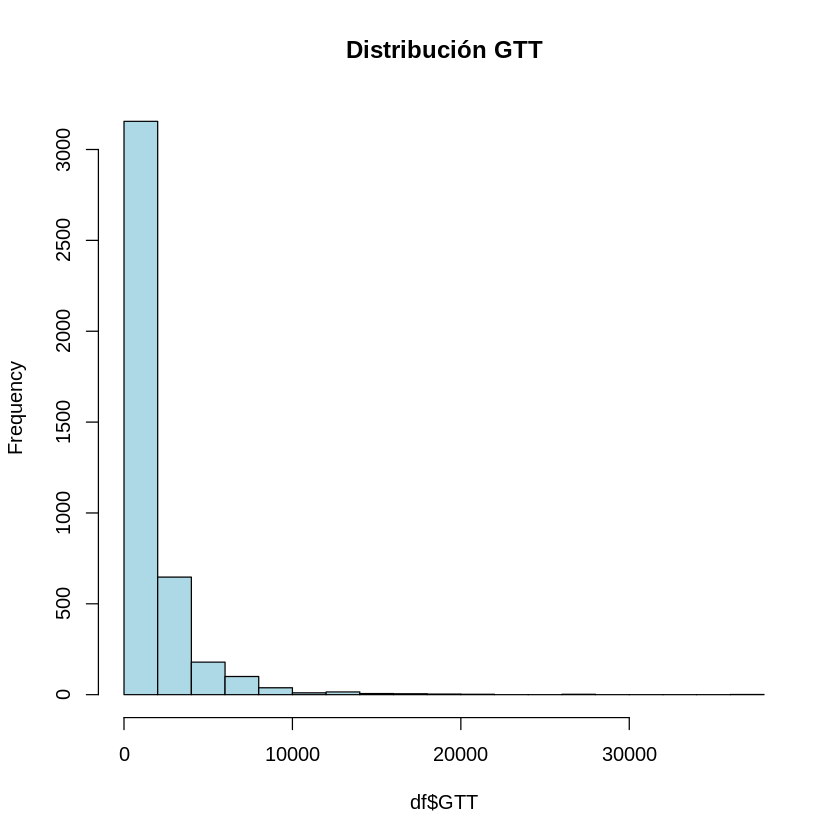

In [10]:
hist(df$GTT, main='Distribución GTT',col='lightblue')
summary(df$GTT)

Podemos ver el gasto va desde 0 hasta los 37853€. La mayoría del gasto está por debajo de los 10000€ y más concretamente, el 75% de las observaciones tienen un gasto por debajo de los 2000€ aproximadamente. Lo bueno de los árboles es que no necesitan que los datos sigan una distribución concreta.

##4.1 División de los datos
Dividiremos los datos en un conjunto de datos de entrenamiento (train) y otro de prueba(test).








In [11]:
set.seed(1)#ponemos una semilla
train <- sample(1:nrow(df), size = nrow(df)*0.75)
datos_train <- df[train,]
datos_test  <- df[-train,]

##4.2 Ajuste del modelo

Para construir el primer árbol vamos a utilizar la función rpart en la que vamos a indicarle el modelo, es decir a partir de qué variables se va a predecir el gasto.  

Para indicar que lo que queremos es realizar un árbol de regresión en vez de clasificación, tenemos que poner `method = "anova"`. De esta manera además, como criterio de división de los nodos se utilizará el MSE y así mismo tenemos que decidir un criterio de parada en la división de los nodos, en este caso utilizaremos que en cada nodo haya mínimo un 5% de los datos.

In [12]:
modelo<-rpart(GTT~TMUNI+NHOGAR+EHOGAR+SEXO+NACIONALIDAD+NIVEST+ENSEÑANZA+CENTROED+BECA, data=datos_train, method = "anova",
minbucket=ceiling(0.05*nrow(datos_train)),#el tamaño de la hoja es el 5% de los datos
cp=0, maxsurrogate = 0) #cp para la poda que veremos más adelante y maxsurrogate para los valores perdidos
sum(modelo$frame$var == "<leaf>") #cuenta el número de hojas

[1] 9

##4.3 Representación gráfica

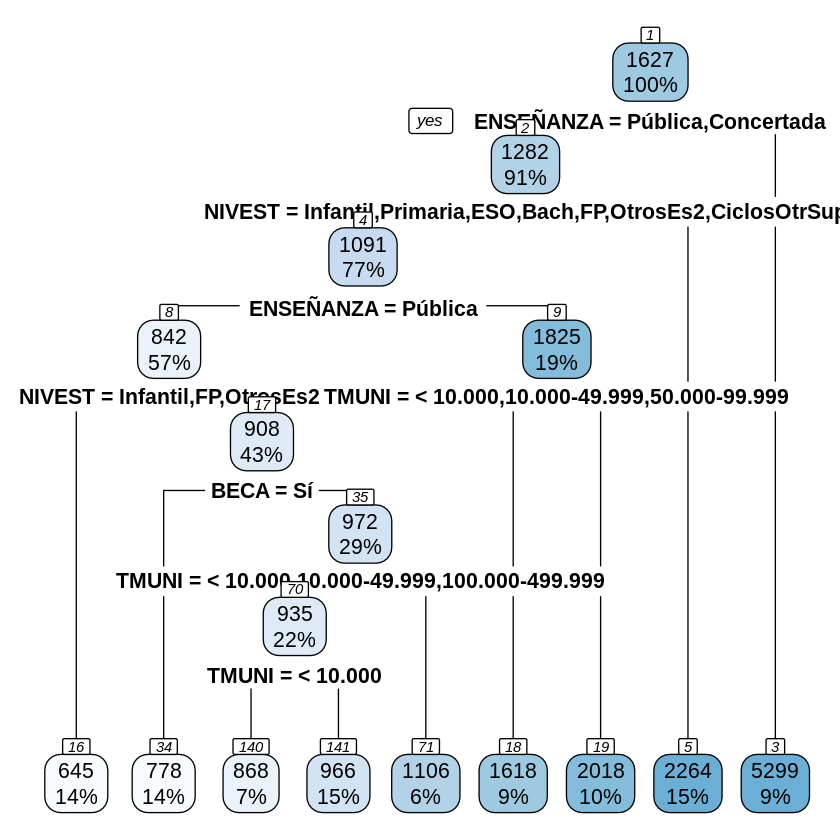

In [13]:
rpart.plot(modelo,nn=TRUE,tweak=1.1,mar=c(0,0,0,0)) #tweak para cambiar el tamaño de la letra

##4.4 Interpretación
Como podemos ver, tenemos un árbol con 9 hojas y una profundidad de 6. Tenemos un código de color que nos muestra cómo son las predicciones; es decir, los estudiantes con menos gasto(en blanco), y con más gasto, en azul cada vez más oscuro.

Para interpretar los resultados tenemos que fijarnos en los nodos y su división. Por ejemplo para el primer nodo se ha hecho una división entre enseñanza pública y concertada con privada; cabe mencionar que las divisiones siempre son por pares. Lo que quiere decir yes y no es que para las observaciones que son pública y concertada se van hacia la izquierda y para la que son de de enseñanza privada, se van hacia la derecha y así sucesivamente para los siguientes nodos. Como era de esperar, las personas que van a la privada son las que más gastos tienen.

Para que quede más claro vamos a interpretar las personas que tienen un gasto medio de 645 y las que tienen un gasto medio de 1106.

Para las de 645, son estudiantes que van a la pública, de infantil, FP u otros estudios de secundaria.

Para las de 1106, son estudiantes que van a la pública y que cursan primaria, ESO, bachillerato o ciclos y otros estudios de educación superior que no han recibido beca y con un tamaño de municipio de 10000 a 49999 habitantes o de más de 500000.



A veces los árboles son complicados de visualizar al tener muchas hojas por ser muy grandes por lo que no es tan fácil sacar conclusiones al verse mal, por lo que tenemos la función `rpart.rules` que nos permite sacar las conclusiones igual que en la parte anterior;indicamos `nn=T` para que nos muestre los nodos y cover el porcentaje de observaciones.

In [14]:
asRules(modelo)


 Rule number: 141 [GTT=966.465957446808 cover=470 (15%)]
   ENSEÑANZA=Pública,Concertada
   NIVEST=Infantil,Primaria,ESO,Bach,FP,OtrosEs2,CiclosOtrSup
   ENSEÑANZA=Pública
   NIVEST=Primaria,ESO,Bach,CiclosOtrSup
   BECA=No
   TMUNI=< 10.000,10.000-49.999,100.000-499.999
   TMUNI=10.000-49.999,100.000-499.999

 Rule number: 5 [GTT=2263.65301724138 cover=464 (15%)]
   ENSEÑANZA=Pública,Concertada
   NIVEST=Univers

 Rule number: 16 [GTT=645.371937639198 cover=449 (14%)]
   ENSEÑANZA=Pública,Concertada
   NIVEST=Infantil,Primaria,ESO,Bach,FP,OtrosEs2,CiclosOtrSup
   ENSEÑANZA=Pública
   NIVEST=Infantil,FP,OtrosEs2

 Rule number: 34 [GTT=778.248306997743 cover=443 (14%)]
   ENSEÑANZA=Pública,Concertada
   NIVEST=Infantil,Primaria,ESO,Bach,FP,OtrosEs2,CiclosOtrSup
   ENSEÑANZA=Pública
   NIVEST=Primaria,ESO,Bach,CiclosOtrSup
   BECA=Sí

 Rule number: 19 [GTT=2018.45367412141 cover=313 (10%)]
   ENSEÑANZA=Pública,Concertada
   NIVEST=Infantil,Primaria,ESO,Bach,FP,OtrosEs2,CiclosOtrSup
   E

Para ver las reglas de un determinado nodo, basta con ver el número del nodo y buscarlo; además se indica el gasto medio y el número de observaciones(cover). Como podemos ver para el nodo 3 la única división es que el estudiante va a la privada y también confirmamos que las conclusiones sacadas anteriormente para los nodos 16 y 71 son correctos.

Además para ver más información podemos utilizar un `summary`.



In [15]:
summary(modelo)

Call:
rpart(formula = GTT ~ TMUNI + NHOGAR + EHOGAR + SEXO + NACIONALIDAD + 
    NIVEST + ENSEÑANZA + CENTROED + BECA, data = datos_train, 
    method = "anova", minbucket = ceiling(0.05 * nrow(datos_train)), 
    cp = 0, maxsurrogate = 0)
  n= 3122 

            CP nsplit rel error    xerror       xstd
1 0.2716393328      0 1.0000000 1.0004891 0.09196776
2 0.0367075415      1 0.7283607 0.7308523 0.06527779
3 0.0300165810      2 0.6916531 0.6944587 0.06393418
4 0.0016709483      3 0.6616365 0.6647445 0.06392222
5 0.0015914801      4 0.6599656 0.6673166 0.06409669
6 0.0007661730      5 0.6583741 0.6651709 0.06406991
7 0.0003094742      6 0.6576079 0.6648897 0.06411094
8 0.0001018244      7 0.6572985 0.6651333 0.06411353
9 0.0000000000      8 0.6571966 0.6651182 0.06411033

Variable importance
ENSEÑANZA    NIVEST     TMUNI 
       88        11         1 

Node number 1: 3122 observations,    complexity param=0.2716393
  mean=1626.533, MSE=4662085 
  left son=2 (2854 obs) right son=3 (268

La primera parte, se refiere a la parte de la poda que vamos a ignorar. 


Por otro lado, vemos la importancia de las variables, en el que el 88 en enseñanza lo que quiere decir es que el 88% de la reducción del modelo se debe al tipo de enseñanza. Esto lo veremos en un gráfico después de analizar las siguientes salidas. 

Esta salida nos proporciona cómo se ha ido construyendo el árbol. Nos da el número de observaciones, la media y el error cuadrático medio. Para los nodos que no son hojas nos da las mejores particiones.
Para el nodo 1 podemos ver que tenemos 3122 observaciones y la variable que fue utilizada fue ENSEÑANZA ya que al ser la primera es la que más mejoraba el MSE, lo hacía reducir un 27% aproximadamente que es lo que nos indica el improve. Si no hubiera sido ese, el siguiente sería NIVEST que produciriía una mejora del 10.2%. Lo que nos indica *splits* es como se ha dividido el nodo; L es left y R es right. Entonces LLR quiere decir que las dos primeras categorías de ENSEÑANZA, que son pública y concertada se han ido a la izquierda y la privada, a la derecha.

Si tuvieramos valores perdidos tendríamos que indicar valores para `maxsurrogate`; lo que hace esto es crear tantas reglas sustitutas como hayamos idicado para cuando no haya valor en esa observación. Para el ejemplo utilizaremos los datos totales(df); no el de train.

In [16]:
mod_sust<-rpart(GTT~TMUNI+NHOGAR+EHOGAR+SEXO+EDAD+NACIONALIDAD+NIVEST+ENSEÑANZA+CENTROED+BECA, data=df, method = "anova",
minbucket=ceiling(0.05*nrow(df)),
cp=0, maxsurrogate = 2) #creamos 2 reglas sustitutas
summary(mod_sust)

Call:
rpart(formula = GTT ~ TMUNI + NHOGAR + EHOGAR + SEXO + EDAD + 
    NACIONALIDAD + NIVEST + ENSEÑANZA + CENTROED + BECA, data = df, 
    method = "anova", minbucket = ceiling(0.05 * nrow(df)), cp = 0, 
    maxsurrogate = 2)
  n= 4163 

             CP nsplit rel error    xerror       xstd
1  0.2579822355      0 1.0000000 1.0002023 0.10001850
2  0.0350256421      1 0.7420178 0.7432993 0.07548981
3  0.0292508963      2 0.7069921 0.7148192 0.07483604
4  0.0047885983      3 0.6777412 0.6793886 0.07466351
5  0.0016404166      4 0.6729526 0.6793886 0.07466351
6  0.0012114203      5 0.6713122 0.6790981 0.07467867
7  0.0007593615      6 0.6701008 0.6788824 0.07470239
8  0.0003470663      7 0.6693414 0.6779722 0.07475185
9  0.0002989218      9 0.6686473 0.6778741 0.07475373
10 0.0000000000     10 0.6683484 0.6779668 0.07475874

Variable importance
ENSEÑANZA    NIVEST      EDAD  CENTROED     TMUNI 
       82        11         5         3         1 

Node number 1: 4163 observations,    comp

En esta salida podemos ver que se crean las regas sustitutas correspondientes a *surrogate splits*. Para el nodo 2, si tuvieramos valores ausentes en NIVEST se utilizaría la EDAD donde teniendo menos
de 19.5 años clasificaría a la izquierda y si hubiera también valores ausentes en esta variable se utilizaría CENTROED donde mismo municipio y misma provincia se irían a la izquierda y misma comunidad y distinta comunidad, a la derecha. Los porcentajes indican el grado de acuerdo con la regla principal; para la primera, el 88.1% de las observaciones coinciden utilizando EDAD en vez de NIVEST. Si no hubiera ningún valor para esas dos variables se clasificaría en en el nodo hijo con el mayor número de observaciones.

También podemos observar que hay nodos en los que no aparece ninguna regla sustituta o sólo una. Esto ocurre porque no hay variables que den mejores resultados que categorizándola en la categoría mayoritaria.

##4.5 Importancia de las variables y calidad del modelo

ENSEÑANZA     NIVEST      TMUNI       BECA 
4390611052  557443431   30307168   11151671

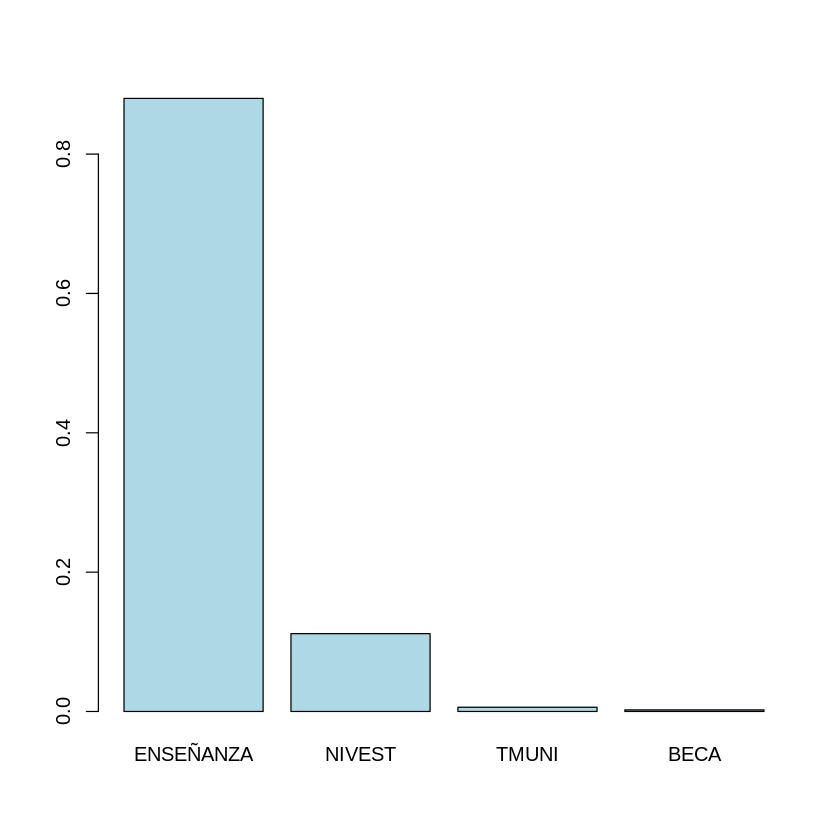

In [17]:
modelo$variable.importance
barplot(modelo$variable.importance/sum(modelo$variable.importance),col='lightblue')

Aquí podemos comprobar gráficamente la importancia de las variables. Como en la construcción del árbol se utiliza el MSE, la importancia de las variables son muy grandes. Al dividir entre la suma de esta, se está relativizando para que sea más fácil de interpretar. Si se utilizan reglas sustitutas, se incluyen también en la importancia de las variables por lo que hay que tener cuidado y hacer un árbol aparte con `maxsurrogate=0`.

Por último, obtenemos el R² para determinar la calidad del modelo.

In [18]:
predicciones <- predict(modelo, newdata = datos_test)
test_mse    <- mean((predicciones - datos_test$GTT)^2)

rsq <- function (y_act, y_pred) cor(y_act, y_pred) ^ 2#función que calcula el R2


paste("El MSE es:", round(test_mse,2))
paste("El R² es:", rsq(datos_test$GTT,predicciones))

[1] "El MSE es: 3963716.69"

[1] "El R² es: 0.280891065928677"

Como vemos, el modelo no es muy bueno ya que sólo explica el 28.08% de la variabilidad del modelo por lo que se vamos a hacer un árbol más grande(hoja más pequeña) y aplicar el podado.

[1] 50

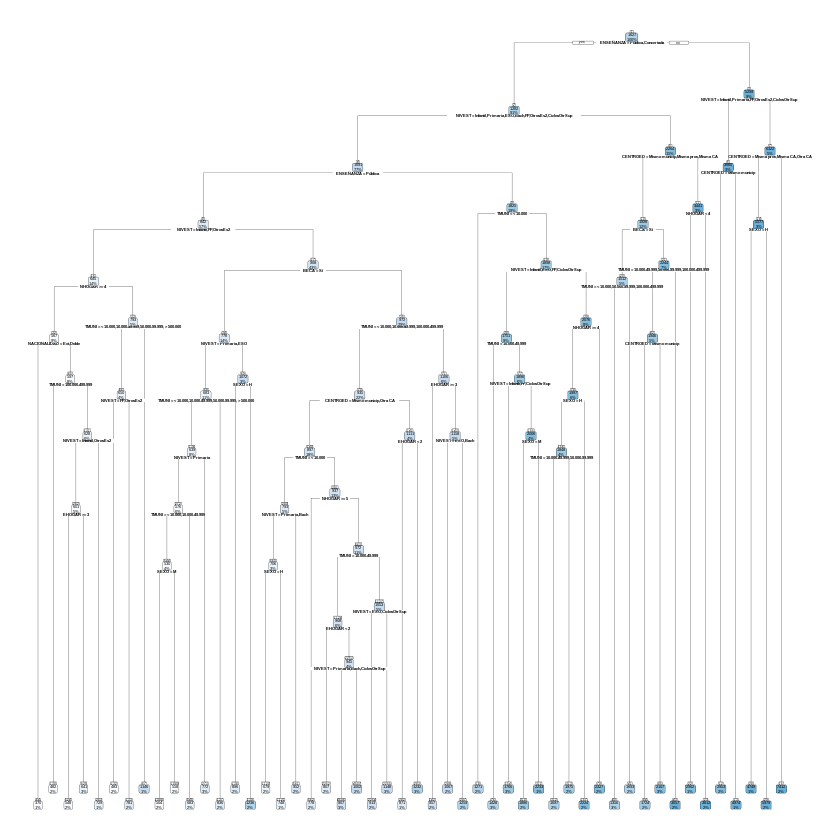

In [19]:
modelogran<-rpart(GTT~TMUNI+NHOGAR+EHOGAR+SEXO+NACIONALIDAD+NIVEST+ENSEÑANZA+CENTROED+BECA, data=datos_train, method = "anova",
minbucket=ceiling(0.01*nrow(datos_train)),
cp=0, maxsurrogate = 0) 
sum(modelogran$frame$var == "<leaf>") 
rpart.plot(modelogran,nn=TRUE,tweak=1.25,mar=c(0,0,0,0))

In [20]:
predicciones <- predict(modelogran, newdata = datos_test)
test_mse    <- mean((predicciones - datos_test$GTT)^2)

rsq <- function (y_act, y_pred) cor(y_act, y_pred) ^ 2#función que calcula el R2


paste("El MSE es:", round(test_mse,2))
paste("El R² es:", rsq(datos_test$GTT,predicciones))

[1] "El MSE es: 3736785.29"

[1] "El R² es: 0.322192782926983"

Como podemos observar, este modelo es un poco mejor que el anterior pero también hay más discrepancia entre los R², esto se debe a que hay sobreajuste. Además este gráfico es demasiado grande para poder sacar alguna conclusión por lo que procederemos a realizar el podado.

#5.Poda
El podado de un árbol consiste en quitar algunas hojas para reducir su tamaño y así también reducir el sobreajuste ya que esto se suele realizar cuando el árbol es grande para que no pierda capacidad predictiva. En la poda se define el riesgo de los subárboles, que es lo que se pretende minimizar, como:

$$R_\alpha (T)= error(T) + \alpha |T|error(T_1)$$ siendo $T$ el subárbol que se está evaluando, $T_1$ la raíz, $ \alpha$ el parámetro de penalización y $|T|$ el número de hojas de T. El $error(T)$ se refiere a la suma de cuadrados de residuos (SSE).

$\alpha$ está comprendido entre 0 y 1; si es 0, se esta cogiendo el árbol total y si es 1 se estaría cogiendo sólo la raíz. Los valores que puede tomar $\alpha$ son infinitos, pero sólo se seleccionan aquellos que den divisiones en los árboles. Por lo que al crear el árbol maximal, cuanto más pequeño sea $\alpha$, más grande será el árbol. Cada vez que se divide un nodo, al pasar de $l$ hojas a $l+1$: 
$$\alpha= \frac{error(T_l)-error(T_{l+1})}{error(T_1)}$$

En R, $\alpha$ es lo que correspondería al parámetro *cp* que en el modelo indicamos como 0; se recomienda este valor porque registrará todos los valores que sean superiores a este. Ahora echemos un vistazo a la tabla:

##5.1 Búsqueda de $\alpha$

In [21]:
modelogran$cptable

,CP,nsplit,rel error,xerror,xstd
1,2.716393e-01,0,1.0000000,1.0003032,0.09195848
2,3.670754e-02,1,0.7283607,0.7293026,0.06507784
3,3.089134e-02,2,0.6916531,0.7069745,0.06544934
4,3.001658e-02,3,0.6607618,0.6879816,0.06464864
5,1.260710e-02,4,0.6307452,0.6376376,0.06128623
6,9.206824e-03,5,0.6181381,0.6412704,0.06189980
7,6.570803e-03,6,0.6089313,0.6286938,0.05902005
8,3.341439e-03,7,0.6023605,0.6259216,0.05876210
9,2.237411e-03,9,0.5956776,0.6240169,0.05867715
10,1.695535e-03,10,0.5934402,0.6255688,0.05856857


Como se ha indicado antes, *cp* corresponde a $\alpha$, *nsplit* es el número de divisiones, lo que corresponde al número de hojas menos 1, *rel error* es el error de árbol dividido entre el de la raíz; es decir, es el porcentaje del error con respecto a no usar árbol(en entrenamiento); además este coincide con 1-R²; *xerror* es en validación cruzada. Cabe destacar que la reducción del error es mayor con valores de $\alpha$ más grandes que con los pequeños ya que al pasar de un árbol con una hoja a dos, se reduce en un 28% y pasar de 2 a 3 ya sólo se reduce un 3%.
Para determinar el punto de corte podemos hacer una representación gráfica.

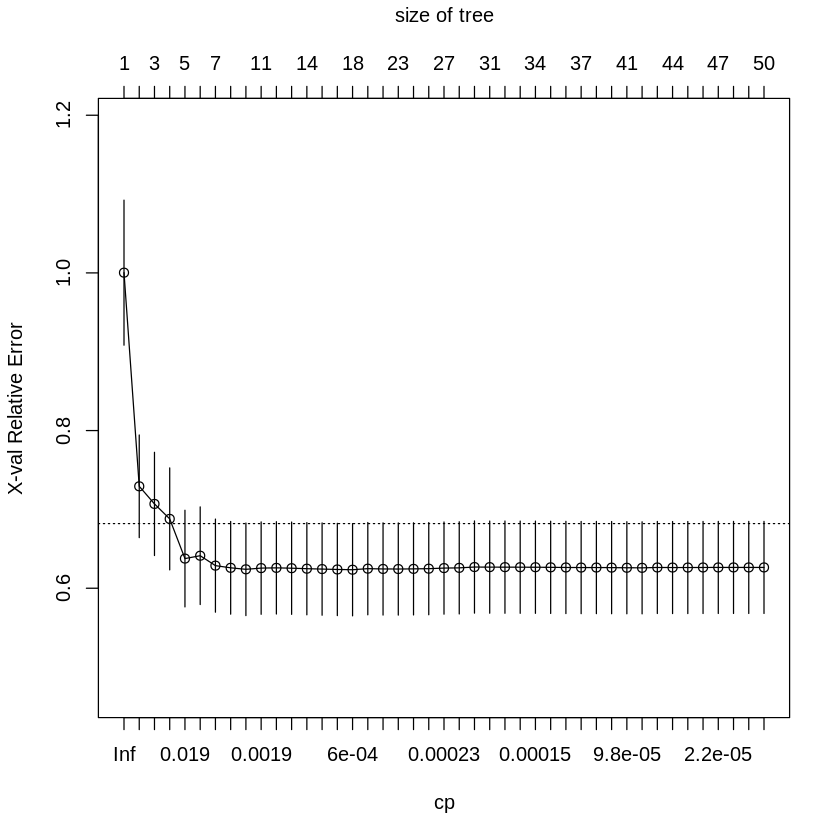

In [22]:
plotcp(modelogran)

La línea horizontal nos indica dónde ya no hay casi mejora, los puntos debajo de esta, desde el punto de vista predictivo, no son significativamente diferentes entre sí. Gráficamente el modelo se estabilizaría en torno a 12 o 13 hojas(miramos en la parte superior del gráfico) pero sabiendo lo anterior, escogemos 4(está por encima de la línea horizontal) que corresponde a un $\alpha$ de 3.001658e-02.


##5.2 Podado del modelo
Una vez hallado el valor de alpha, creamos un nuevo modelo con este.

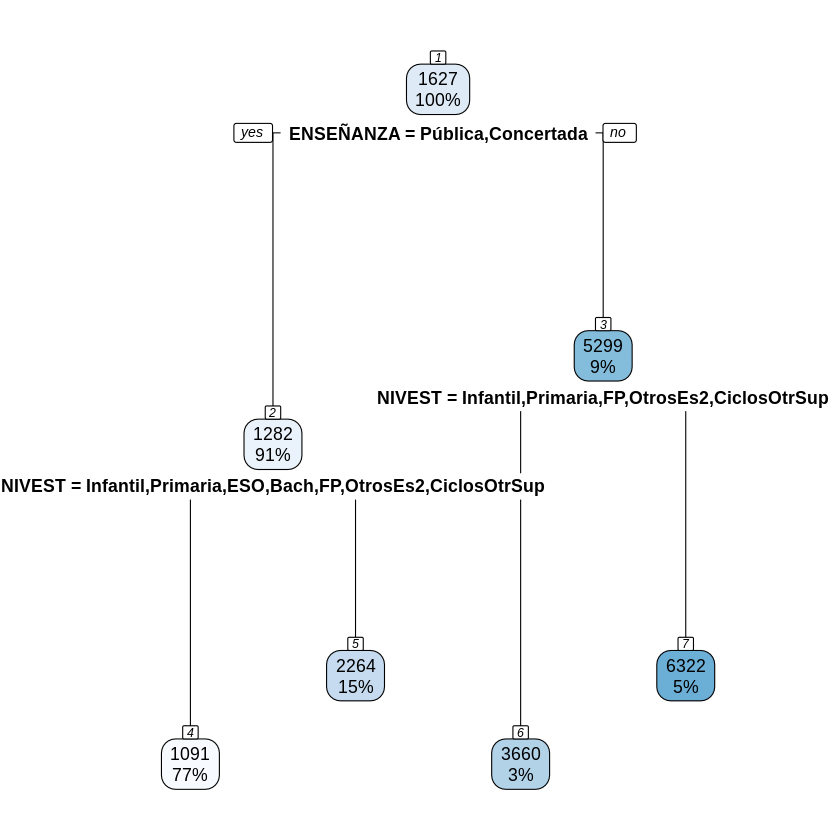

In [23]:
modelo_pod <- prune(modelogran, cp = modelogran$cptable[4,1])
#indico la fila 4, es donde se ubica el subárbol deseado
rpart.plot(modelo_pod,nn=TRUE,tweak=0.9)


ENSEÑANZA     NIVEST 
3953718797  983903742

[1] "El R² es: 0.278231188209254"

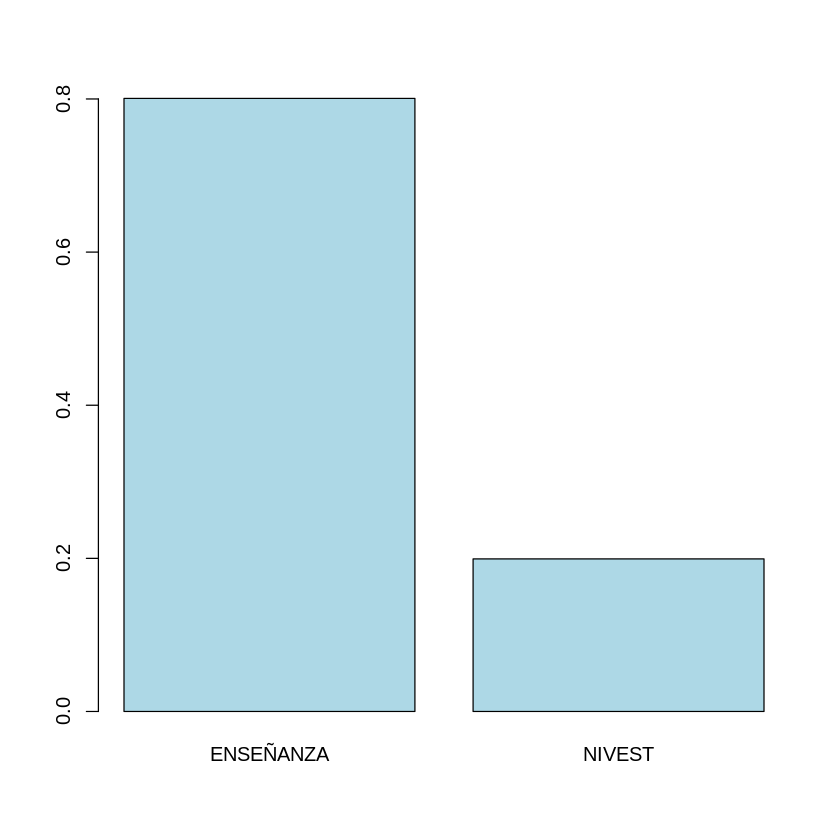

In [24]:
modelo_pod$variable.importance
barplot(modelo_pod$variable.importance/sum(modelo_pod$variable.importance),col='lightblue')

predicciones <- predict(modelo_pod, newdata = datos_test)
paste("El R² es:", rsq(datos_test$GTT,predicciones))

Como podemos ver, obtenermos un árbol con 4 hojas y 2 de profundidad; siendo el  R² un poco más bajo que el modelo sin podar pero casi no hay diferencia en cuanto a capacidad predictiva. En este caso las variables que influyen son enseñanza y el nivel de estudios. 

#6.Árboles con menos variables

Como hemos visto que las variables significativas son enseñanza y el nivel de estudios, en este apartado vamos a no ponerlas y aplicar lo anterior,  para ver cómo se comporta el árbol sin estas y probando con distintas variables.

##6.1 Ejemplo 1 con TMUNI y CENTROED

[1] 13

,CP,nsplit,rel error,xerror,xstd
1,7.144531e-02,0,1.0000000,1.0005010,0.09195826
2,2.491669e-02,1,0.9285547,0.9299246,0.08859110
3,9.653480e-03,2,0.9036380,0.9061625,0.08467351
4,7.122035e-03,3,0.8939845,0.8978996,0.08423593
5,3.302628e-03,4,0.8868625,0.8916956,0.08406995
6,2.296123e-03,5,0.8835599,0.8930334,0.08457130
7,9.436659e-04,6,0.8812637,0.8927601,0.08465095
8,9.214608e-04,7,0.8803201,0.8950740,0.08475950
9,3.422535e-04,8,0.8793986,0.8945662,0.08475726
10,3.226415e-04,9,0.8790564,0.8953394,0.08477326


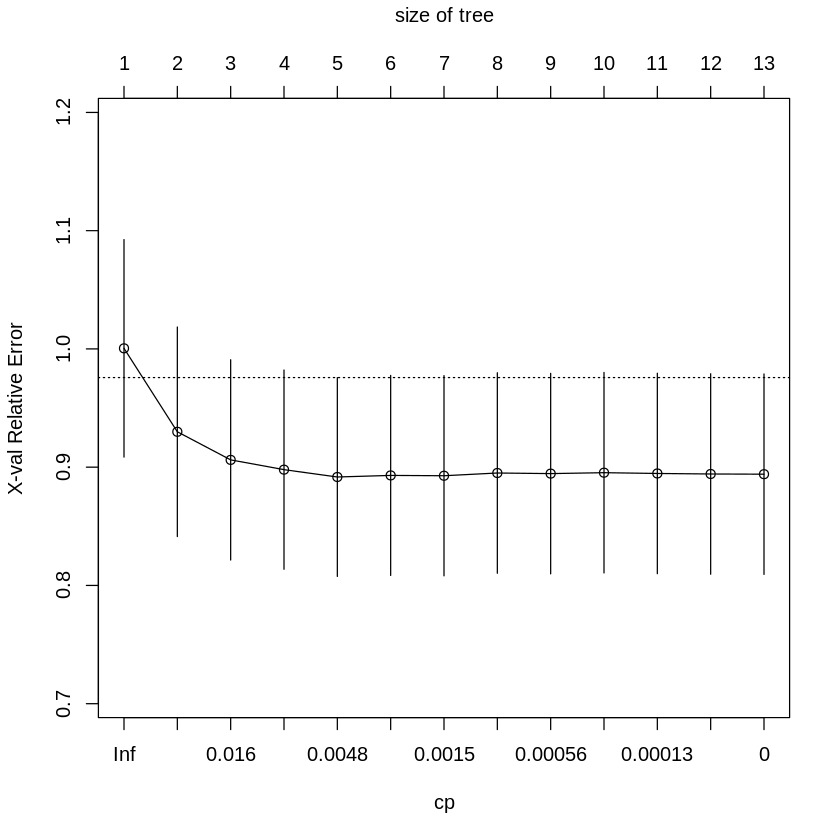

In [25]:
modelo1<-rpart(GTT~TMUNI+CENTROED, data=datos_train, method = "anova",
minbucket=ceiling(0.01*nrow(datos_train)),

cp=0, maxsurrogate = 0) 
sum(modelo1$frame$var == "<leaf>")
modelo1$cptable
plotcp(modelo1)

[1] "El R² es: 0.0930641622840784"

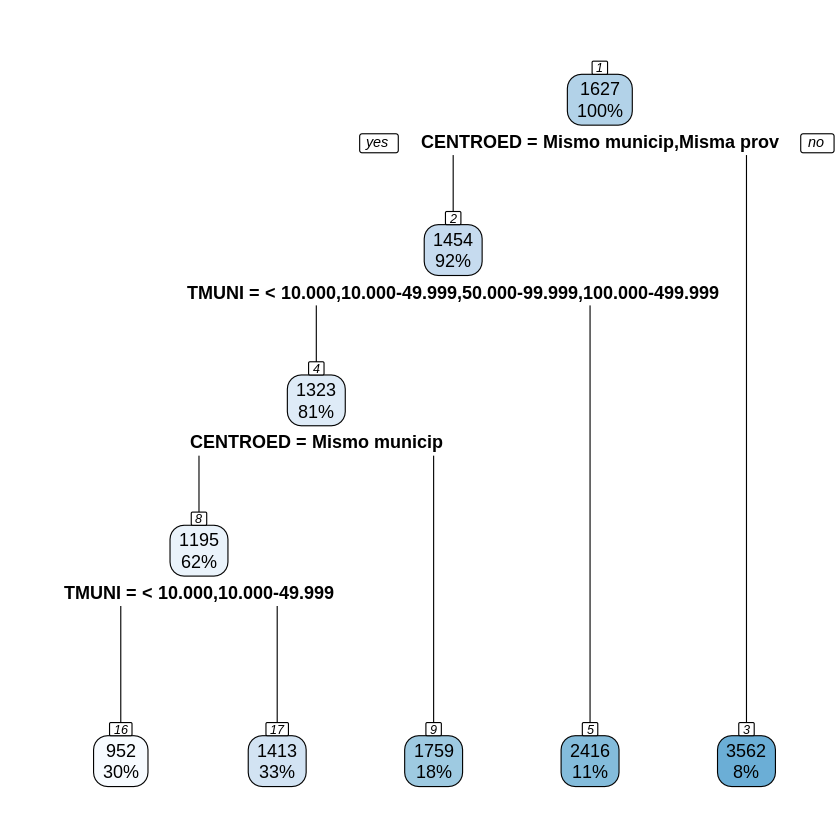

In [26]:
modelo_pod1 <- prune(modelo1, cp = modelo1$cptable[5,1])
rpart.plot(modelo_pod1,nn=TRUE,tweak=0.9)
predicciones <- predict(modelo_pod1, newdata = datos_test)
paste("El R² es:", rsq(datos_test$GTT,predicciones))

Como podemos ver, tenemos un R² bastante malo, del 9%, por lo que vemos la importancia de las que hemo quitado; pero podemos ver que los estudiantes que gastan más son personas que estudian en otra provincia u otra comunidad, mientras que las que menos, son personas que viven en el mismo municipio y con un tamaño de municipio menor de 50000 habitantes.

##6.2 Ejemplo 2 con BECA y SEXO


[1] 4

[1] "El R² es: 0.00944882698713606"

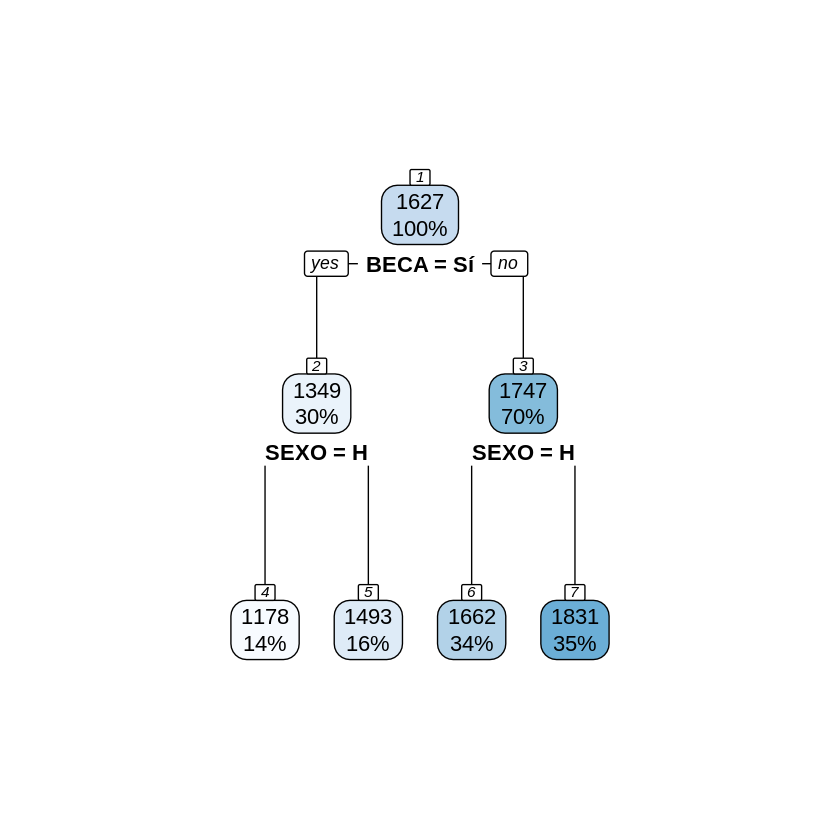

In [27]:
modelo2<-rpart(GTT~BECA+SEXO, data=datos_train, method = "anova",
minbucket=ceiling(0.01*nrow(datos_train)),

cp=0, maxsurrogate = 0) 
sum(modelo2$frame$var == "<leaf>")

#siendo un modelo tan pequeño aquí no tiene mucho sentido podar
rpart.plot(modelo2,nn=TRUE,tweak=1.1,mar=c(0,0,0,0))

predicciones <- predict(modelo2, newdata = datos_test)
paste("El R² es:", rsq(datos_test$GTT,predicciones))

Como vemos, este modelo directamente casi no sirve ya que podemos ver que el R² no llega al 1% y las diferencias entre las hojas son bastante pocas aunque sí cabe destacar que parece que el hecho de tener o no beca sí influye un poco.

##6.2 Ejemplo 3 con ENSEÑANZA y NIVEST
Por último realizamos el árbol que supuestamente nos tiene que dar mejor resultados que los anteriores.

[1] 16

,CP,nsplit,rel error,xerror,xstd
1,2.716393e-01,0,1.0000000,1.0004179,0.09193618
2,3.670754e-02,1,0.7283607,0.7302193,0.06485405
3,3.089134e-02,2,0.6916531,0.7059197,0.06554136
4,3.001658e-02,3,0.6607618,0.6849051,0.06421755
5,3.536962e-03,4,0.6307452,0.6434982,0.06146523
6,1.591480e-03,5,0.6272082,0.6452132,0.06314913
7,1.166555e-03,6,0.6256168,0.6458837,0.06326827
8,6.075121e-04,7,0.6244502,0.6453756,0.06324304
9,5.304341e-04,8,0.6238427,0.6458166,0.06325990
10,1.373031e-04,9,0.6233123,0.6455421,0.06340220


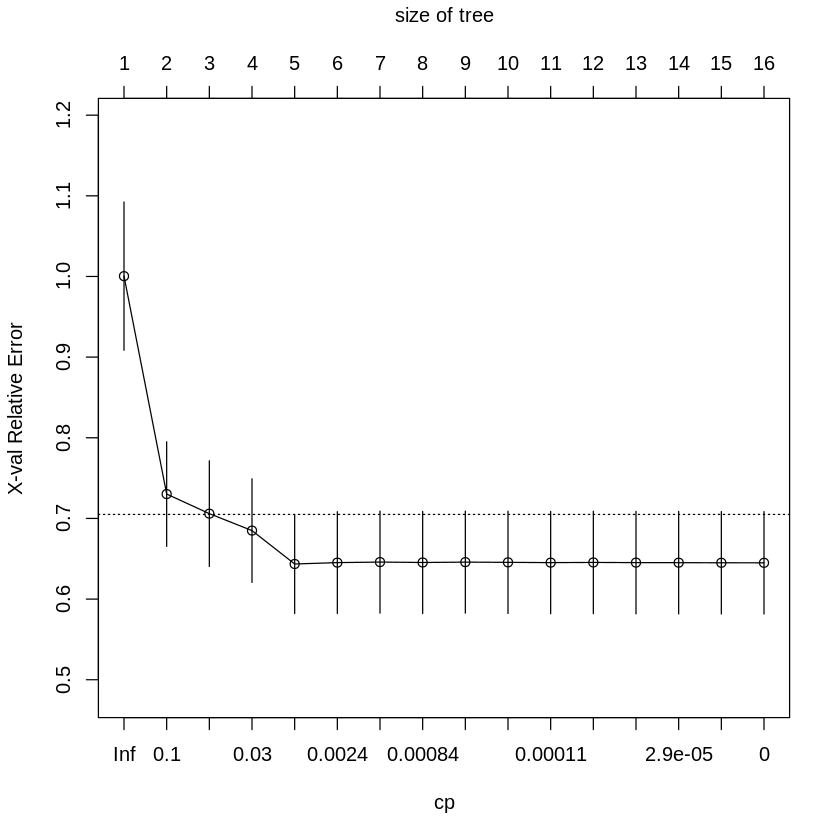

In [28]:
modelo3<-rpart(GTT~ENSEÑANZA+NIVEST, data=datos_train, method = "anova",
minbucket=ceiling(0.01*nrow(datos_train)),

cp=0, maxsurrogate = 0) 
sum(modelo3$frame$var == "<leaf>")
modelo3$cptable
plotcp(modelo3)

[1] "El R² es: 0.305564776752834"

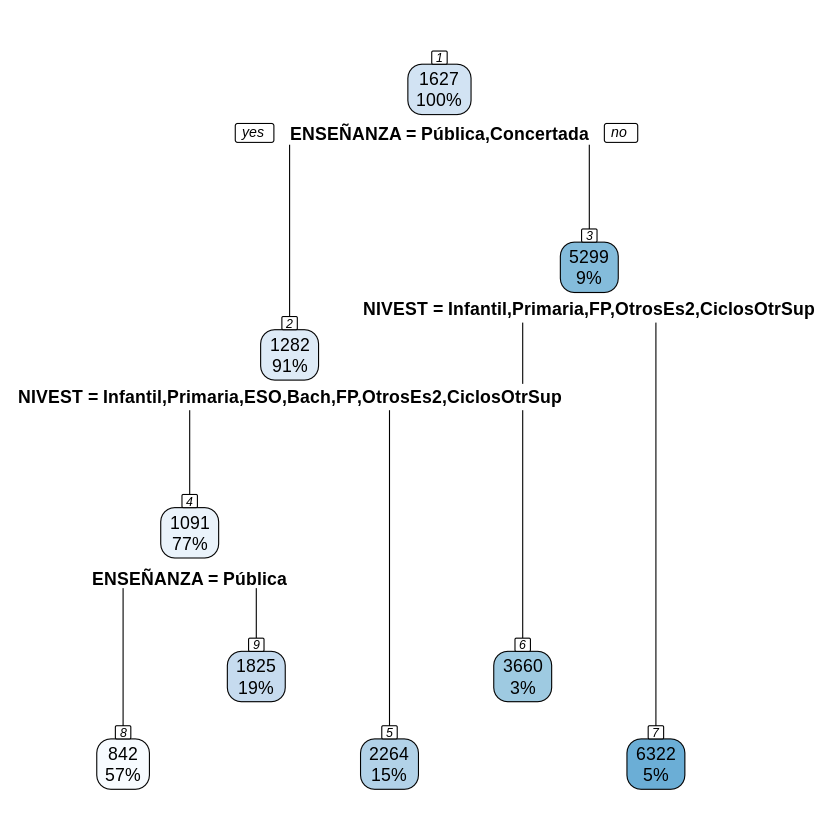

In [29]:
modelo_pod3 <- prune(modelo3, cp = modelo3$cptable[5,1])
rpart.plot(modelo_pod3,nn=TRUE,tweak=0.9)
predicciones <- predict(modelo_pod3, newdata = datos_test)
paste("El R² es:", rsq(datos_test$GTT,predicciones))

Como se veía venir, el R² ya es mucho mejor, ya que nuestro modelo inicial era lo que indicaba; las personas que menos gastan son las que van a enseñanza pública y no universitarios; y los que más con los que van a la privada y cursan ESO, bachillerato o van a la universidad como ya veíamos para el modelo podado.

#7.Bibliografía
https://www.cienciadedatos.net/documentos/33_arboles_de_prediccion_bagging_random_forest_boosting

https://lost-stats.github.io/Machine_Learning/decision_trees.html

https://cran.r-project.org/web/packages/rpart/rpart.pdf